In [62]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# single stick sticking down

In [112]:
n = Node(form_obs([9,12,13,16]),2)

n.children[0].parent
# n.parent

In [102]:
def run2taskL(taskL,nitr = 50):
  ntasks = len(taskL)
  rt = np.zeros([nitr,4,ntasks])
  for itr in range(nitr):
    for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
      rt[itr,idx] = treeSearch([t0,t1],BFS=bfs,memory=mem)
  return rt
idxL = ['BFS','DFS','BFSm','DFSm']

### trivial training, onestep test

In [113]:
t0=Task(form_obs([9,12,13,16]),1,0)
t1=Task(form_obs([9,12,13,16,20]),1,1)
nitr = 100
rt = run2taskL([t0,t1],nitr)

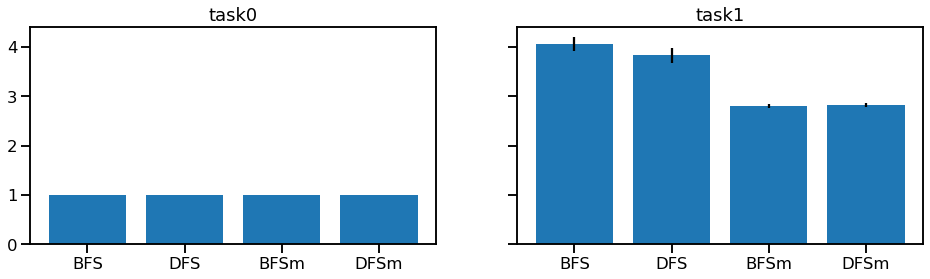

In [114]:
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt.mean(0)[:,ti],yerr=rt.std(0)[:,ti]/np.sqrt(nitr))

### 1step learn twostep

In [117]:
t0=Task(form_obs([9,12,13,16,6]),1,1)
t1=Task(form_obs([9,12,13,16,3,7]),1,2)
t2=Task(form_obs([9,12,13,16,6,3]),1,2)
nitr = 100
rt1 = run2taskL([t0,t1],nitr)
rt2 = run2taskL([t0,t2],nitr)

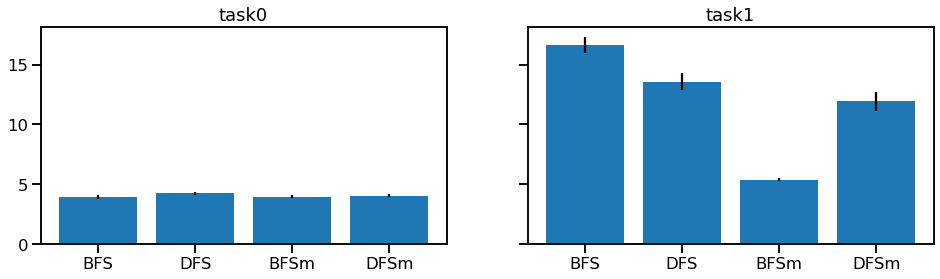

In [118]:
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt2.mean(0)[:,ti],yerr=rt2.std(0)[:,ti]/np.sqrt(nitr))

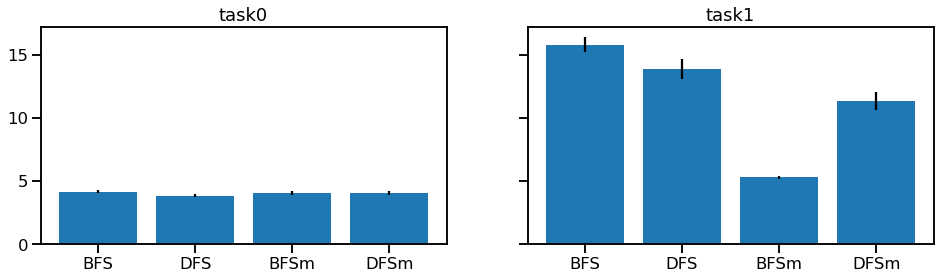

In [119]:
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt1.mean(0)[:,ti],yerr=rt1.std(0)[:,ti]/np.sqrt(nitr))

In [12]:
def eval_nsteps(play_fn,task,nitr):
  nsteps = np.zeros(nitr)
  for itr in np.arange(nitr):
    nsteps[itr] = play_fn(task)
  return nsteps


Text(0, 0.5, 'solution time')

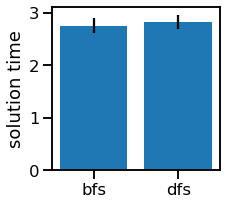

In [25]:
nitr = 100
bfs_steps = eval_nsteps(BFSplay,task,nitr)
dfs_steps = eval_nsteps(BFSplay,task,nitr)

## plt
xplt = ['bfs','dfs']
yplt = [bfs_steps.mean(),
        dfs_steps.mean()
       ]
yerplt = [bfs_steps.std()/np.sqrt(nitr),
          dfs_steps.std()/np.sqrt(nitr)
         ]

f,axar = plt.subplots(1,1,figsize=(3,3))
ax =axar
ax.bar(xplt,yplt,yerr=yerplt)
ax.set_ylabel('solution time')

In [28]:
import queue
q1 = queue.Queue()
q1.put(10)
q1.

In [44]:
COUNT_SQUARE_IDX = [
    [1,4,5,8], # ones in first row
    [2,5,6,9], # ones in second row
    [3,6,7,10],
    [8,11,12,15],
    [9,12,13,16],
    [10,13,14,17],
    [15,18,19,22],
    [16,19,20,23],
    [17,20,21,24]
]

COUNT_SQUARE_MATRIX = np.zeros([9,24])
for idx_row,idx_col in enumerate(COUNT_SQUARE_IDX):
  M[idx_row,np.array(idx_col)-1] = 1

0
1
2
3
4
5
6
7
8


array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 